# A FICO problem

Fico is the industry standard for determining credit worthiness. However, research shows that FICO is overused. FICO's usage fits the idiom "square peg in a round hole".

Evidence:

* A [research study](https://www.stlouisfed.org/publications/regional-economist/october-2008/did-credit-scores-predict-the-subprime-crisis) by the Federal Reserve Bank of St. Louis demonstrates that __FICO scores were a poor indicater of the subprime mortgage crisis__.
> Given the nature of FICO scores, one might expect to find a relationship between borrowers’ scores and the incidence of default and foreclosure.....FICO scores have not indicated that relationship....higher FICO scores have been associated with bigger increases in default rates over time.
* [Studies prove](https://www.marketwatch.com/story/your-digital-footprint-could-provide-a-more-accurate-credit-score-2018-05-03) that __digital footprints can outperform FICO__.
> Those who order from mobile phones are three times as likely to default as those who order from desktops. A customer who uses her name in her email address is 30 percent less likely to default than one who doesn’t. Those who shop between noon and 6 p.m. are half as likely to default as midnight to 6 a.m. buyers
* FICO depends on credit usage (CU). __CU is unreliable__ because it fluctuates through economic cycles. [CU amongs millenials dropped](http://fortune.com/2018/02/27/why-millennials-are-ditching-credit-cards/), especially during the 2008 recession. But being debt conscious is financially desirable.
* Paying timely minimums on credit statements results in both a strong score and __mounting debt__.
* Credit utilization ratios factor heavily into FICO ( $util = \frac{debt}{availCredt}$ ). A healthy utilization is < 0.3. Credit card sneak companies sneakily encourage opening several credit lines to improve this ratio. There is a conflict of interest, because __they profit on credit debt__.

# An ML solution to credit defaults

30,000 instances of credit default data were collected by the University of California Irvine. We will predict credit defaults by training a variety of machine learning models using this data set.

### Data Cleansing and Exploration

In [64]:
import pandas as pd
fname = './UCI_Credit_Card.csv'

pd.set_option('display.max_columns', None)
pd.option_context('mode.use_inf_as_null', True)

df = pd.read_csv(fname)
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
18664,18665,80000.0,2,2,2,28,0,0,0,0,0,0,79688.0,78165.0,68579.0,50312.0,44277.0,44488.0,2800.0,2398.0,2000.0,2000.0,1700.0,2005.0,0
28012,28013,220000.0,2,1,2,28,-1,0,-1,0,-1,-1,6601.0,8312.0,2102.0,4707.0,7216.0,6565.0,5026.0,2102.0,4000.0,7216.0,6565.0,4757.0,0
12637,12638,100000.0,1,1,3,48,-1,-1,-1,0,0,-1,525.0,1022.0,897.0,897.0,319.0,2757.0,1100.0,1000.0,0.0,0.0,2800.0,5400.0,1
2656,2657,100000.0,1,1,2,27,0,0,2,2,2,2,36014.0,39321.0,39145.0,39494.0,39896.0,28256.0,4200.0,900.0,1400.0,900.0,6440.0,500.0,1
25859,25860,20000.0,2,2,1,44,0,0,0,0,0,0,16231.0,14791.0,14453.0,15320.0,11796.0,9766.0,1600.0,1300.0,1156.0,387.0,354.0,438.0,0
11369,11370,10000.0,1,2,2,23,0,0,-1,-1,0,0,17834.0,8511.0,1651.0,9984.0,10096.0,9847.0,1033.0,1651.0,9984.0,415.0,358.0,114.0,0
20334,20335,440000.0,2,5,1,64,0,0,0,0,0,0,133996.0,136606.0,136771.0,141131.0,147251.0,150332.0,6319.0,5000.0,6625.0,10000.0,5443.0,5501.0,0
2141,2142,140000.0,1,3,1,41,-1,-1,-1,0,-1,-1,2139.0,0.0,1686.0,1686.0,205.0,6689.0,0.0,1686.0,0.0,205.0,6689.0,0.0,0
28206,28207,400000.0,2,1,2,39,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9674,9675,180000.0,1,1,1,31,-1,-1,0,0,-1,-1,1100.0,860.0,1480.0,380.0,740.0,1100.0,860.0,1000.0,0.0,740.0,1100.0,380.0,1


In [65]:
print('Rows of data: ', df.shape[0])
print('Columns of data: ', df.shape[1])

Rows of data:  30000
Columns of data:  25


In [66]:
df = df.drop(['ID'], axis=1)

In [67]:
for i in range(1,7):
    payment_key = 'PAY_AMT'+str(i)
    bill_key = 'BILL_AMT'+str(i)
    frac_paid = df[payment_key]/df[bill_key]
    df['fraction_paid_'+str(i)] = frac_paid
    df = df.drop([bill_key, payment_key], axis=1)
    
with pd.option_context('mode.use_inf_as_null', True):
    df = df.fillna(1)

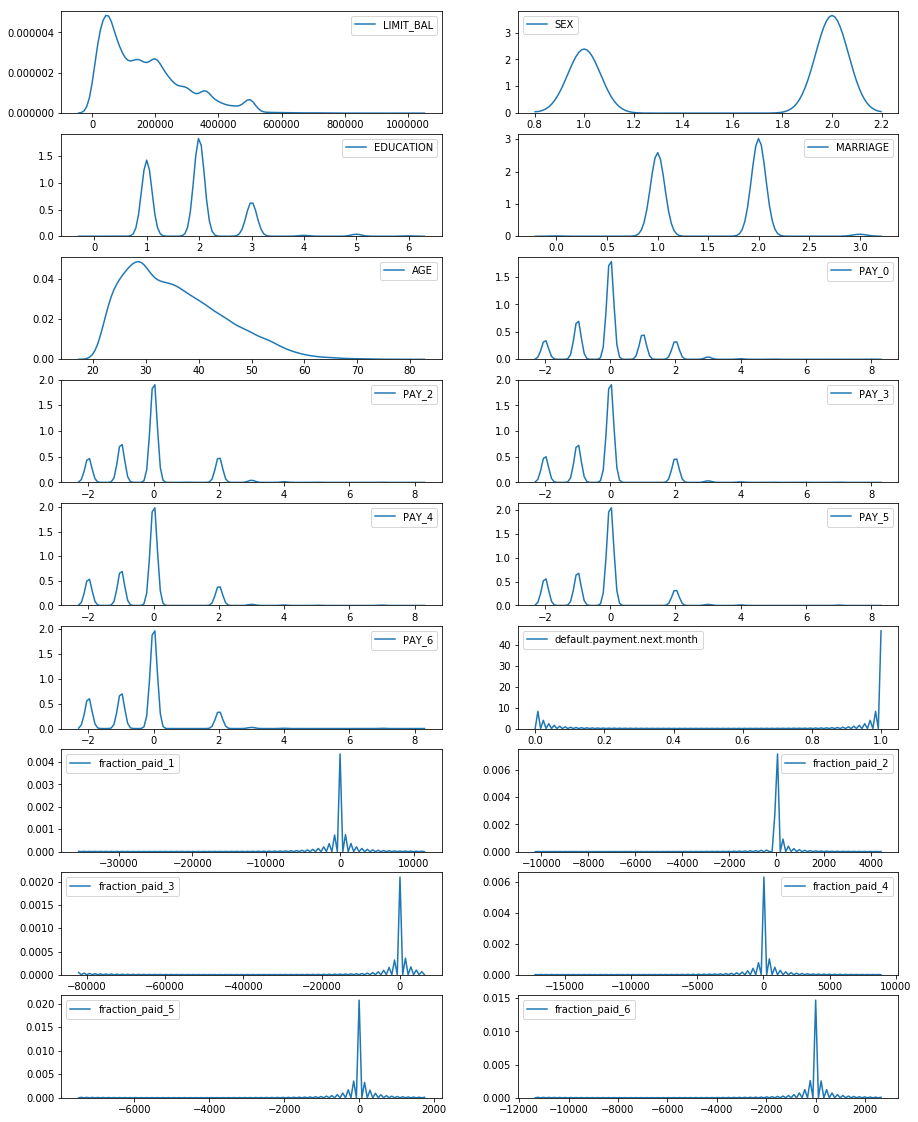

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

ncols = 2
nrows = math.ceil(len(df.columns)/2)

chart, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))

for i, key in enumerate(df.columns):
    row = math.floor(i/ncols)
    col = 0 if i % 2 == 0 else 1
    sns.kdeplot(df[key], ax=axes[row,col])